# **Module 4: Introduction to Fully Connected NN - Assignment**

**Problem Statement:**

Fashion MNIST is a dataset comprising 60,000 training images and 10,000
testing images, each depicting various fashion items in a 28x28 grayscale format.
The dataset encompasses ten distinct categories of apparel. The primary aim of
this assignment is to develop a fully connected neural network (FCNN) that can
accurately classify these images into the correct fashion categories.

**Objectives:**

**Data Visualization and Preprocessing:**

● Visualize the distribution of different fashion items in the dataset to
understand the data better.

● Normalize the image pixel values for effective model training.

● Convert the categorical labels into a one-hot encoded format to suit the
neural network’s output layer.

**Model Architecture and Development:**

● Design a fully connected neural network with appropriate input, hidden,
and output layers.

● Ensure the model is complex enough to capture the underlying patterns in
the data without overfitting.

**Model Training:**

● Train the model on the preprocessed training data, using categorical
cross-entropy as the loss function, stochastic gradient descent as the
optimizer, and accuracy as the evaluation metric.

● Utilize a validation split to monitor the model’s performance on unseen
data during training.

**Performance Evaluation:**

● Assess the model’s performance using both training and validation
datasets.

● Visualize the training and validation loss and accuracy to identify any signs
of overfitting or underfitting.


**IMPORTING LIBRARIES**

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


**LOADING DATASET**

In [21]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [22]:
# Display class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**VISUALISE THE DATASET**

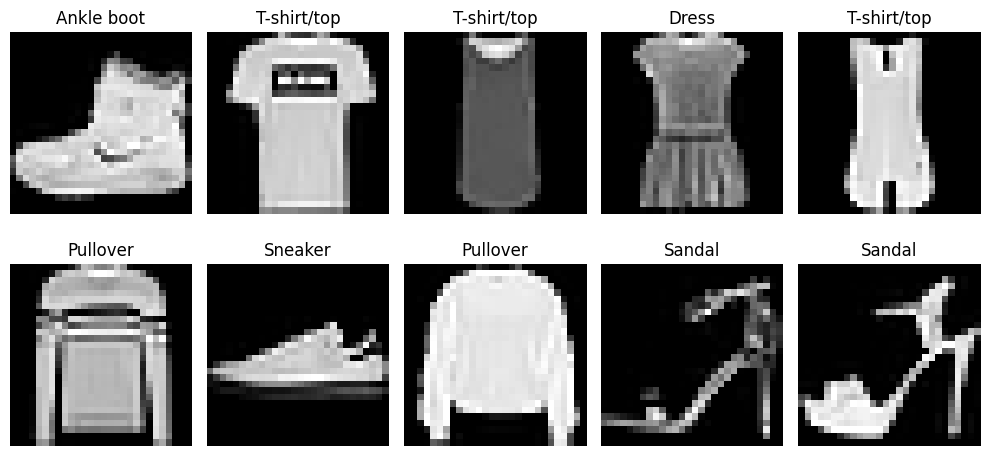

In [23]:
# Plot sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

**PREPROCESSING THE DATA**

In [24]:
# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [25]:
# Original Dimensions
print(f"Original dimension of x_train_normalised : {x_train.shape}")
print(f"Original dimension of x_test_normalised : {x_test.shape}")

Original dimension of x_train_normalised : (60000, 28, 28)
Original dimension of x_test_normalised : (10000, 28, 28)


**BUILDING FULLY CONNECTED NEURAL NETWORK**

In [26]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**COMPILE THE MODEL**

In [27]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

**TRAINING THE MODEL**

In [28]:
history = model.fit(
    x_train, y_train_cat,
    validation_split=0.2,
    epochs=20,
    batch_size=32
)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6463 - loss: 1.0830 - val_accuracy: 0.8123 - val_loss: 0.5450
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8144 - loss: 0.5375 - val_accuracy: 0.8250 - val_loss: 0.4881
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8359 - loss: 0.4752 - val_accuracy: 0.8460 - val_loss: 0.4504
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8450 - loss: 0.4407 - val_accuracy: 0.8478 - val_loss: 0.4436
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8520 - loss: 0.4193 - val_accuracy: 0.8559 - val_loss: 0.4150
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8600 - loss: 0.4042 - val_accuracy: 0.8622 - val_loss: 0.3997
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8657 - loss: 0.3891 - val_accuracy: 0.8620 - val_loss: 0.3940
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8670 - loss: 0.3761 

**EVALUATING THE MODEL**

In [29]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8741 - loss: 0.3595
Test Accuracy: 0.8711


**VISUALISING THE TRAINING HISTORY**

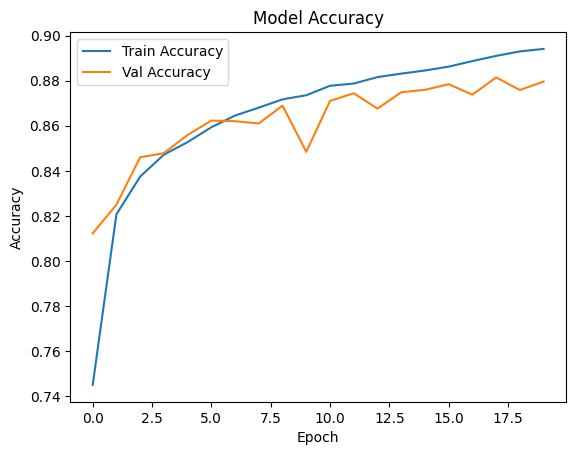

In [30]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


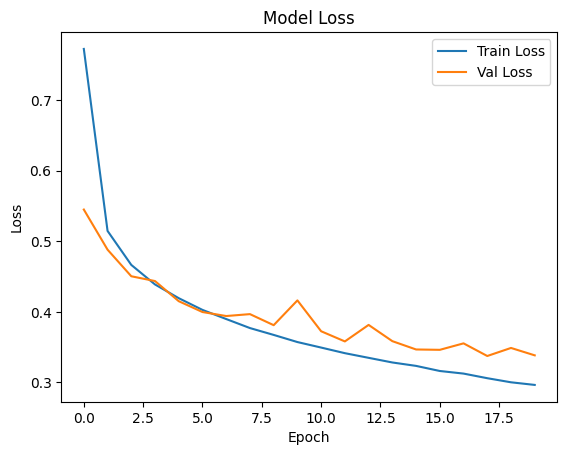

In [31]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Label : 8 , Class : Bag


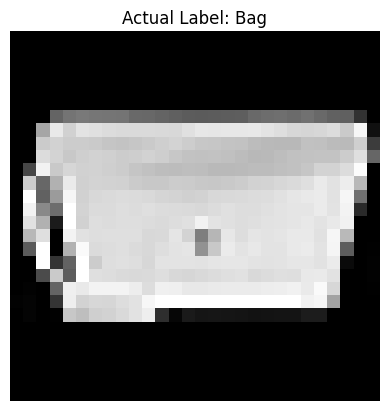

In [32]:
# Predict the class for the 110th training image
pred = model.predict(x_train[110].reshape(1, 28, 28))  # Keep it (1, 28, 28) for Flatten layer
print(f"Label : {pred.argmax()} , Class : {class_names[pred.argmax()]}")

# Define the see_image function
def see_image(image, label):
    import matplotlib.pyplot as plt
    plt.imshow(image, cmap='gray')
    plt.title(f"Actual Label: {class_names[label]}")
    plt.axis('off')
    plt.show()

# Visualize the image
see_image(x_train[110], y_train[110])


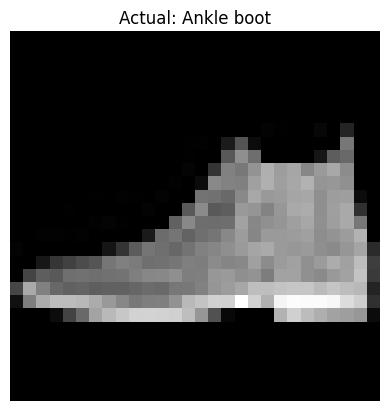

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted Class: Ankle boot


In [33]:
index = 0
sample_image = x_test[index]  # shape: (28, 28)

# Display the image
plt.imshow(sample_image, cmap='gray')
plt.title("Actual: " + class_names[y_test[index]])
plt.axis('off')
plt.show()

# Expand dims to make it (1, 28, 28)
sample_input = np.expand_dims(sample_image, axis=0)

# Make prediction
pred = model.predict(sample_input)
predicted_class = np.argmax(pred)

print("Predicted Class:", class_names[predicted_class])


**SAVING THE MODEL**

In [34]:
# Save the entire model
model.save('fashion_mnist_fcnn_model.h5')
